# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [12]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

13840


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [13]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [14]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'higher_order_chromosome')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\higher_order_chromosome\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\higher_order_chromosome\figures.


# Plotting parameters

In [15]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [16]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [17]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [18]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [19]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load distance matrices

## cell-type-specific median dict

In [21]:
# Load class_2_median
# class to median distance dict
class_2_median_filename = os.path.join(input_folder, 'class_2_medianDict.pkl')

class_2_medianDict = pickle.load(open(class_2_median_filename, 'rb'))
print(class_2_medianDict.keys())

dict_keys(['Gluta', 'GABA', 'Astro', 'Endo', 'Micro', 'Oligo'])


# Load CpG density for correlation

Example of CpG information

[external/resources/refgen_with_loci_index_CG_Density](../../external/resources/refgen_with_loci_index_CG_Density.csv)

In [22]:
CG_fname = os.path.join(output_analysis_folder,'refgen_with_loci_index_CG_Density.csv')
MOp_CG = pd.read_csv(CG_fname)
MOp_CG

,name,id,chr,chr_order,library,dtype,loci_name,start,end,hyb,delta,loci_index,CG_density_100kb,CG_density_1Mb
0,1:3742742-3759944,1,chr1,0,CTP11,combo,chr1_3742742_3759944,3742742,3759944,0,0,0,453,4624
1,1:6245958-6258969,2,chr1,1,CTP11,combo,chr1_6245958_6258969,6245958,6258969,1,2503216,1,725,5382
2,1:8740008-8759916,3,chr1,2,CTP11,combo,chr1_8740008_8759916,8740008,8759916,2,4997266,2,533,4294
3,1:9627926-9637875,1,chr1,3,CTP13,combo,chr1_9627926_9637875,9627926,9637875,3,5885184,3,683,7266
4,1:9799472-9811359,2,chr1,4,CTP13,combo,chr1_9799472_9811359,9799472,9811359,4,6056730,4,1008,7658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,9:118751319-118759956,559,chr9,97,CTP11,combo,chr9_118751319_118759956,118751319,118759956,97,115000180,1074,1155,13802
1913,9:119425689-119434008,544,chr9,98,CTP13,combo,chr9_119425689_119434008,119425689,119434008,98,115674550,1075,1904,14885
1914,9:121252615-121259973,560,chr9,99,CTP11,combo,chr9_121252615_121259973,121252615,121259973,99,117501476,1076,1242,12677
1915,9:123457587-123467505,545,chr9,100,CTP13,combo,chr9_123457587_123467505,123457587,123467505,100,119706448,1077,803,7377


# Load ATAC for correlation

Example can be generated from the notebook below

[0_locus_annotation/scripts/5_majorType_atac_and_rna_means_by_loci](../0_locus_annotation/scripts/5_majorType_atac_and_rna_means_by_loci.ipynb)

In [23]:
locus_info_folder = r'L:\Shiwei\postanalysis_2024\v0\locus_annotation\analysis'

import tqdm
sel_class_list = ['Gluta','Astro','Oligo']
ref_measure_dict_byGroup = {}

for _class in tqdm.tqdm(sel_class_list):
    _class_name = _class.replace(' ','_').replace('/','_')
    #print(_class_name)
    rna_atac_fname = os.path.join(locus_info_folder,f'majorType_{_class_name}_snATAC_snRNA_mean_by_loci.csv')
    if os.path.exists(rna_atac_fname):
        rna_atac_df = pd.read_csv(rna_atac_fname).set_index('loci_name', drop=True)
        ref_measure_dict_byGroup[_class] = rna_atac_df[[c for c in rna_atac_df.columns if 'mean' in c]]
        

ref_measure_dict_byGroup[_class].head()

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 37.98it/s]


,mean_rna_2X_2000kb,mean_ATAC_2X_2000kb
loci_name,,
chr1_3742742_3759944,3.309091,1.756951
chr1_6245958_6258969,12.713636,2.300586
chr1_8740008_8759916,5.313636,2.467588
chr1_9627926_9637875,5.018182,2.440787
chr1_9799472_9811359,5.018182,2.485176


# Load compartment analysis results

Data below can be generated from notebook:

[3_1_ab_compartment_and_pca_analysis_pm_majorType](3_1_ab_compartment_and_pca_analysis_pm_majorType.ipynb)

In [24]:
import pickle


dict_pca_fname = os.path.join(output_analysis_folder,f'majorType_pca_analysis_result.pkl')
dict_pca_result = pickle.load(open(dict_pca_fname,'rb'))

# Plot figures

## cross-correlation matrices and PCs

meta NOT subset; don't know how to subset; dropped


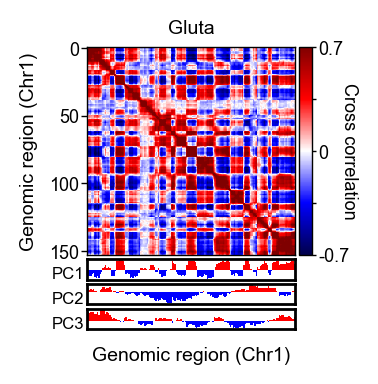

meta NOT subset; don't know how to subset; dropped


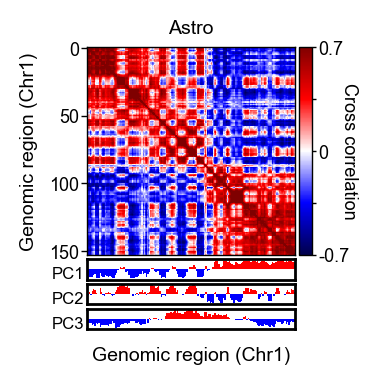

meta NOT subset; don't know how to subset; dropped


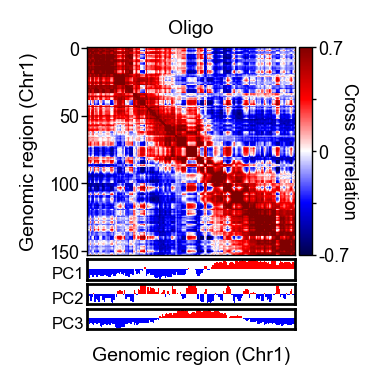

In [27]:
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

chrom = 'chr1'

save_fig = True

for cell_type in ['Gluta','Astro','Oligo'][:]:

    correlation_map = dict_pca_result[(cell_type, chrom)]['correlation_map']

    fig, ax1 = plt.subplots(figsize=(_page_width/3,_page_width/3), dpi=200)
    # create a color map
    current_cmap = cm.get_cmap('seismic').copy()
    current_cmap.set_bad(color=[0.5,0.5,0.5,1])
    vmin = -0.7
    vmax = 0.7
    _pf = ax1.imshow(correlation_map, 
                     cmap=current_cmap, vmin=vmin, vmax=vmax)
    
    ax1.set_ylabel(f"Genomic region (Chr{chrom.split('chr')[1]})", fontsize = 7)
    ax1.xaxis.set_tick_params(which='both', labelbottom=True)
    ax1.yaxis.set_tick_params(which='both', labelleft=True)
    ax1.set_title(f"{cell_type}", fontsize=_font_size,pad=5)
    ax1.tick_params('both', labelsize=_font_size-0.5, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]
    # locate ax1
    divider = make_axes_locatable(ax1)
    # colorbar ax
    cax = divider.append_axes('right', size='6%', pad="2%")
    cbar = plt.colorbar(_pf,cax=cax, ax=ax1, ticks=[vmin, vmin/2, 0.0, vmax/2, vmax])
    cbar.ax.set_yticklabels([str(vmin), '', '0', '', str(vmax)])
    cbar.ax.tick_params('both', labelsize=_font_size-0.5, 
                    width=_ticklabel_width, length=_ticklabel_size-0.5,
                    pad=1, labelleft=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]
    #cbar.set_ticks([vmin,vmax])
    cbar.outline.set_linewidth(_ticklabel_width)
    cbar.set_label('Cross correlation', 
                   fontsize=_font_size-0.5, labelpad=3, rotation=270)
    cbar.ax.minorticks_off()

    # create bottom ax in order
    for _pc_name_idx, _pc_name in enumerate(['norm_pc1','norm_pc2','norm_pc3']):
        norm_pc1 = dict_pca_result[(cell_type, chrom)][_pc_name]
        bot_ax = divider.append_axes('bottom', size='10%', pad="2%", 
                                     sharex=ax1, xticks=[])
        bot_ax.bar(np.where(norm_pc1>0)[0], norm_pc1[norm_pc1>0], color='r', width=1, bottom=0)
        bot_ax.bar(np.where(norm_pc1<=0)[0], norm_pc1[norm_pc1<=0],color='b', width=1, bottom=0)

        bot_ax.tick_params('x', labelsize=_font_size-0.5, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
        bot_ax.tick_params('y', labelsize=_font_size-1, 
                        width=_ticklabel_width, length=0,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
        bot_ax.set_ylabel(f"PC{_pc_name_idx+1}", fontsize = 6, rotation=0, labelpad=7, y=-0.1)
        
        if _pc_name_idx==2:
            bot_ax.set_xlabel(f"Genomic region (Chr{chrom.split('chr')[1]})", fontsize = 7)


    # save
    figure_file = os.path.join(output_figure_folder,f"{cell_type.replace('/','_').replace(' ','_')}_{chrom}_ABcompartment_majorType.pdf")
    if save_fig:
        plt.savefig(figure_file,
                    transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)
        plt.savefig(figure_file.replace('.pdf', '.png'),
                    transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)

    plt.show()

## scatterplots for CpG

In [28]:
from scipy import stats

meta NOT subset; don't know how to subset; dropped


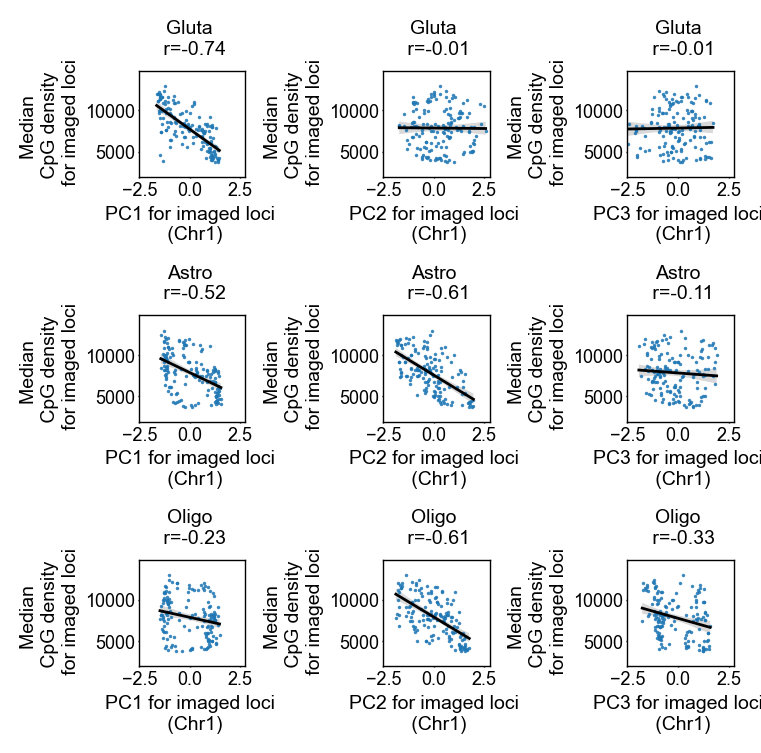

In [32]:
%matplotlib inline
chrom = 'chr1'

fig, axes = plt.subplots(3,3, figsize = (_page_width/1.45,_page_width/1.45), dpi=200)
#ax_flat = axes.flatten()

for _cell_idx, cell_type in enumerate(['Gluta','Astro','Oligo']):

    # reference modality to correlate
    cell_ref_byChr = np.array(MOp_CG[MOp_CG['chr']==f'{chrom}']['CG_density_1Mb'].tolist())
    # PCs by celltype by chromosome
    sel_pca_res = dict_pca_result[(cell_type, chrom)]
    
    for _pc_idx, sel_pcs in enumerate([sel_pca_res['norm_pc1'],sel_pca_res['norm_pc2'],sel_pca_res['norm_pc3']]):
        
        y= cell_ref_byChr
        x= sel_pcs
        
        res = stats.spearmanr(x,y)
        # flip sign if needed
        if res[0] >=0:
            x = -sel_pcs
            res = stats.spearmanr(x,y)
            
        # plot figures    
        ax = axes[_cell_idx, _pc_idx]
        
        plot_df = pd.DataFrame({'PCs':x,'Ref info':y})
        gfg = sns.regplot(data=plot_df, x= 'PCs', y = 'Ref info', ax=ax, ci=95,
                  line_kws={'linewidth':1,"color": "black"}, scatter=False,
                 )
        ax.scatter(x, y, s=0.2, 
                   #ax=ax,
                   #c='black',
                   alpha=0.85)

        ax.tick_params('x', labelsize=_font_size-0.5, 
                                    width=_ticklabel_width, length=0.5,
                                    pad=1, labelbottom=True) 
        ax.tick_params('y', labelsize=_font_size-0.5, 
                                width=_ticklabel_width, length=0.5,
                                pad=1, labelleft=True)

        ax.set_xlim([-2.5,2.75])
        #ax.set_ylim([-2.75,2.75])
            
        ax.set_xlabel(f'PC{_pc_idx+1} for imaged loci \n ({chrom.capitalize()})', fontsize=_font_size, labelpad=2)
        ax.set_ylabel(f'Median \n CpG density \n for imaged loci', fontsize=_font_size, labelpad=2)
        ax.set_title(f'{cell_type} \n r={round(res[0],2)}',fontsize=_font_size)
        [i[1].set_linewidth(0.5) for i in ax.spines.items()]     
        ax.margins(0.2)

            
plt.tight_layout()
plt.subplots_adjust(hspace=1.3, wspace = 1.3)

plt.savefig(os.path.join(output_figure_folder,f"{chrom}_pc_corr_with_CG_majorType.pdf"),
                    transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)
plt.show()

## scatterplots for ATAC

meta NOT subset; don't know how to subset; dropped


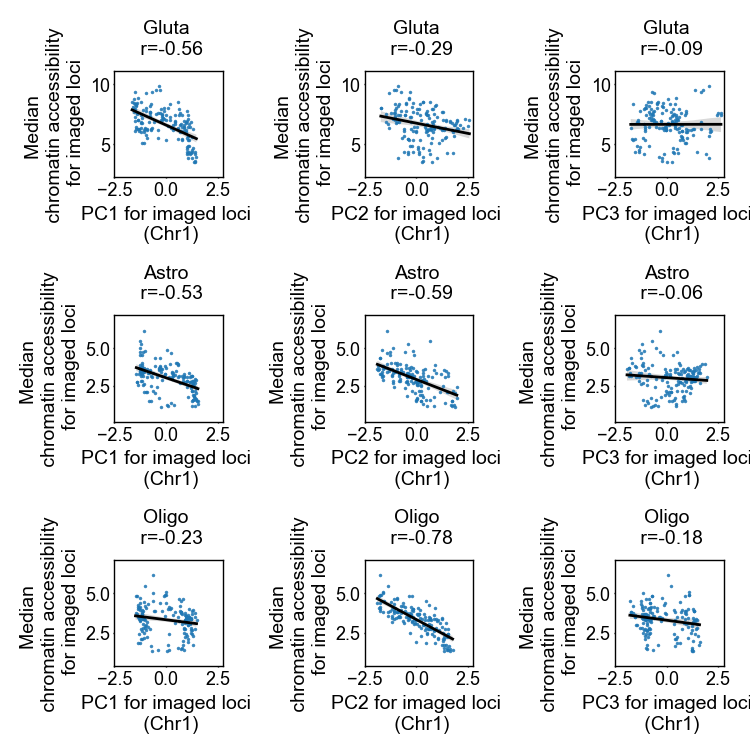

In [33]:
%matplotlib inline
chrom = 'chr1'

fig, axes = plt.subplots(3,3, figsize = (_page_width/1.45,_page_width/1.45), dpi=200)
#ax_flat = axes.flatten()

for _cell_idx, cell_type in enumerate(['Gluta','Astro','Oligo']):

    # reference modality to correlate
    rna_atac_df = ref_measure_dict_byGroup[cell_type]
    cell_ref_byChr = np.array(rna_atac_df[rna_atac_df.index.str.contains(f'{chrom}_')]['mean_ATAC_2X_2000kb'].tolist())
    # PCs by celltype by chromosome
    sel_pca_res = dict_pca_result[(cell_type, chrom)]
    
    for _pc_idx, sel_pcs in enumerate([sel_pca_res['norm_pc1'],sel_pca_res['norm_pc2'],sel_pca_res['norm_pc3']]):
        
        y= cell_ref_byChr
        x= sel_pcs
        res = stats.spearmanr(x,y)
        # flip sign if needed
        if res[0] >=0:
            x = -sel_pcs
            res = stats.spearmanr(x,y)
        
        # plot figures    
        ax = axes[_cell_idx, _pc_idx]
        
        plot_df = pd.DataFrame({'PCs':x,'Ref info':y})
        gfg = sns.regplot(data=plot_df, x= 'PCs', y = 'Ref info', ax=ax, ci=95,
                  line_kws={'linewidth':1,"color": "black"}, scatter=False,
                 )
        ax.scatter(x, y, s=0.2, 
                   #ax=ax,
                   #c='black',
                   alpha=0.85)

        ax.tick_params('x', labelsize=_font_size-0.5, 
                                    width=_ticklabel_width, length=0.5,
                                    pad=1, labelbottom=True) 
        ax.tick_params('y', labelsize=_font_size-0.5, 
                                width=_ticklabel_width, length=0.5,
                                pad=1, labelleft=True)

        ax.set_xlim([-2.5,2.75])
        #ax.set_ylim([-2.75,2.75])
            
        ax.set_xlabel(f'PC{_pc_idx+1} for imaged loci \n ({chrom.capitalize()})', fontsize=_font_size, labelpad=2)
        ax.set_ylabel(f'Median \n chromatin accessibility \n for imaged loci', fontsize=_font_size, labelpad=2)
        ax.set_title(f'{cell_type} \n r={round(res[0],2)}',fontsize=_font_size)
        [i[1].set_linewidth(0.5) for i in ax.spines.items()]
        ax.margins(0.2)
        

            
plt.tight_layout()
plt.subplots_adjust(hspace=1.3, wspace = 1.3)
plt.savefig(os.path.join(output_figure_folder,f"{chrom}_pc_corr_with_ATAC_majorType.pdf"),
                    transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)
plt.show()